In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mode


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Generate "data set", Xi is 2D, Yi = {0, 1}
N = 20
mean = [0, 0]
cov = [[1, 0], [0, 1]]
X = np.random.multivariate_normal(mean, cov, N)
Y = np.random.choice([0, 1], size = N)


In [ ]:
# Plot the points 
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()

In [ ]:
# Create new point
x = np.random.multivariate_normal(mean, cov, 1)[0]
print(x)

In [ ]:
# New point is in blue
plt.scatter(X[:,0], X[:,1], c = Y)
plt.scatter(x[0], x[1], color="red")
plt.show()

In [ ]:
# Measure distance from new datapoint to all points in the data set
def euclidean(x, X):
    return np.sqrt(np.sum(x - X)**2)

# Collect the points and distances in a pandas dataframe.
df = pd.DataFrame()

for k in range(N):
    df[k] = np.append(X[k], euclidean(x, X[k]))
    
    
df = df.T
df["Y"] = Y
df


In [2]:
# Sort the dataframe according to the distance 
df.sort_values(2, inplace = True)

# Take the k closest points.
k = 5
df.drop(df.index[k:], inplace=True)
df

NameError: name 'df' is not defined

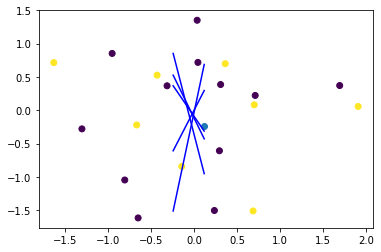

In [14]:
# Plot lines to the closest points to x.
for index in df.index:
    plt.plot(x, X[index], color = "blue")
plt.scatter(X[:,0], X[:,1], c = Y)
plt.scatter(x[0], x[1])
plt.show()

In [9]:
# Take the majority rule of the remaining k Y values.
clf_x = mode((df.Y).to_list())
print("The classification of x becomes:", clf_x)

The classification of x becomes: 0


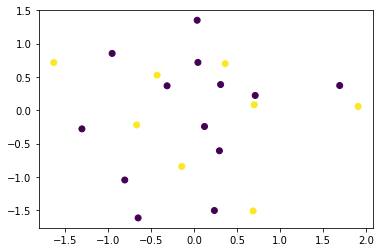

In [10]:
# Plot x as the correct classification.
plt.scatter(x[0], x[1], c = clf_x)
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()